In [1]:
import numpy as np
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

#%config InlineBackend.figure_formats = ['svg']

In [2]:
import rl_dynph1

In [3]:
%matplotlib widget

In [4]:
alpha = np.exp(1j*2/3*np.pi)

Ta0 = np.array([[1,1,1],
                [1,alpha**2,alpha],
                [1,alpha,alpha**2]])

T0a =    np.array([[1,1,1],
                [1,alpha,alpha**2],
                [1,alpha**2,alpha]])

V_0 =   0/np.sqrt(3)
V_1 =   0/np.sqrt(3)
V_2 = 400/np.sqrt(3)

V_a, V_b, V_c = Ta0@np.array([V_0,V_1,V_2]).T

R = 0.5
L = 0.01
Omega_b = 2*np.pi*50

X = Omega_b*L

# I_a, I_b, I_c

R_0,X_0 = 3*R,3*X
R_1,X_1 = R,X
R_2,X_2 = R,X

Z_0 = R_0 + 1j*X_0
Z_1 = R_1 + 1j*X_1
Z_2 = R_2 + 1j*X_2

I_0 = 0.0
I_1 = V_1/Z_1
I_2 = V_2/Z_2



I_a, I_b, I_c = T0a@np.array([I_0,I_1,I_2]).T

print(f'I_a = {np.abs(I_a):0.2f},I_b = {np.abs(I_b):0.2f}, I_c = {np.abs(I_c):0.2f}, {I_a+I_b+I_c}')


#di_d = v_d - R * i_d + L*omega*i_q
#di_q = v_q - R * i_q - L*omega*i_d




I_a = 72.60,I_b = 72.60, I_c = 72.60, (2.842170943040401e-14+1.4210854715202004e-14j)


In [11]:
rldp = rl_dynph1.rl_dynph1_class()
rldp.Dt = 10e-6

V_1 = 400*np.exp(1j*np.pi/2)
V_2 =   0*np.exp(1j*np.pi/2)

rldp.ini({'L':4e-3, 'R':10.0,
          'v_dnr':V_2.real,'v_dni':V_2.imag,'v_qnr':V_2.imag,'v_qni':V_2.real,
          'v_dpr':V_1.real,'v_dpi':V_1.imag,'v_qpr':V_1.imag,'v_qpi':V_1.real})
rldp.run(0.02,{})
V_1 = 400*np.exp(1j*np.pi/2)
V_2 = 400*np.exp(1j*np.pi/2)
rldp.run(0.1,{'v_dnr':V_2.real,'v_dni':V_2.imag,'v_qnr':V_2.imag,'v_qni':V_2.real,
              'v_dpr':V_1.real,'v_dpi':V_1.imag,'v_qpr':V_1.imag,'v_qpi':V_1.real})

rldp.post()

v_dnr,v_dni = rldp.get_values('v_dnr'),rldp.get_values('v_dni')
v_qnr,v_qni = rldp.get_values('v_qnr'),rldp.get_values('v_qni')
v_d0r,v_d0i = rldp.get_values('v_d0r'),rldp.get_values('v_d0i')
v_q0r,v_q0i = rldp.get_values('v_q0r'),rldp.get_values('v_q0i')
v_dpr,v_dpi = rldp.get_values('v_dpr'),rldp.get_values('v_dpi')
v_qpr,v_qpi = rldp.get_values('v_qpr'),rldp.get_values('v_qpi')
v_d2r,v_d2i = rldp.get_values('v_d2r'),rldp.get_values('v_d2i')
v_q2r,v_q2i = rldp.get_values('v_q2r'),rldp.get_values('v_q2i')

i_dnr,i_dni = rldp.get_values('i_dnr'),rldp.get_values('i_dni')
i_qnr,i_qni = rldp.get_values('i_qnr'),rldp.get_values('i_qni')
i_d0r,i_d0i = rldp.get_values('i_d0r'),rldp.get_values('i_d0i')
i_q0r,i_q0i = rldp.get_values('i_q0r'),rldp.get_values('i_q0i')
i_dpr,i_dpi = rldp.get_values('i_dpr'),rldp.get_values('i_dpi')
i_qpr,i_qpi = rldp.get_values('i_qpr'),rldp.get_values('i_qpi')
i_d2r,i_d2i = rldp.get_values('i_d2r'),rldp.get_values('i_d2i')
i_q2r,i_q2i = rldp.get_values('i_q2r'),rldp.get_values('i_q2i')

v_dn = v_dnr + 1j*v_dni
v_qn = v_qnr + 1j*v_qni
v_d0 = v_d0r + 1j*v_d0i
v_q0 = v_q0r + 1j*v_q0i
v_dp = v_dpr + 1j*v_dpi
v_qp = v_qpr + 1j*v_qpi
v_d2 = v_d2r + 1j*v_d2i
v_q2 = v_q2r + 1j*v_q2i

i_dn = i_dnr + 1j*i_dni
i_qn = i_qnr + 1j*i_qni
i_d0 = i_d0r + 1j*i_d0i
i_q0 = i_q0r + 1j*i_q0i
i_dp = i_dpr + 1j*i_dpi
i_qp = i_qpr + 1j*i_qpi
i_d2 = i_d2r + 1j*i_d2i
i_q2 = i_q2r + 1j*i_q2i

Omega_b = 2*np.pi*50
Time = rldp.Time
rldp.v_d = (v_dn*np.exp(1j*(-1)*Omega_b*Time) + v_d0 + v_dp*np.exp(1j*(1)*Omega_b*Time) + v_d2*np.exp(1j*(2)*Omega_b*Time)).real
rldp.v_q = (v_qn*np.exp(1j*(-1)*Omega_b*Time) + v_q0 + v_qp*np.exp(1j*(1)*Omega_b*Time) + v_q2*np.exp(1j*(2)*Omega_b*Time)).real
rldp.i_d = (i_dn*np.exp(1j*(-1)*Omega_b*Time) + i_d0 + i_dp*np.exp(1j*(1)*Omega_b*Time) + i_d2*np.exp(1j*(2)*Omega_b*Time)).real
rldp.i_q = (i_qn*np.exp(1j*(-1)*Omega_b*Time) + i_q0 + i_qp*np.exp(1j*(1)*Omega_b*Time) + i_q2*np.exp(1j*(2)*Omega_b*Time)).real

theta = 0*Omega_b*rldp.Time
rldp.v_a = np.cos(theta-0/3*np.pi)*rldp.v_d - np.sin(theta-0/3*np.pi)*rldp.v_q
rldp.v_b = np.cos(theta-2/3*np.pi)*rldp.v_d - np.sin(theta-2/3*np.pi)*rldp.v_q
rldp.v_c = np.cos(theta-4/3*np.pi)*rldp.v_d - np.sin(theta-4/3*np.pi)*rldp.v_q
rldp.i_a = np.cos(theta-0/3*np.pi)*rldp.i_d - np.sin(theta-0/3*np.pi)*rldp.i_q
rldp.i_b = np.cos(theta-2/3*np.pi)*rldp.i_d - np.sin(theta-2/3*np.pi)*rldp.i_q
rldp.i_c = np.cos(theta-4/3*np.pi)*rldp.i_d - np.sin(theta-4/3*np.pi)*rldp.i_q

fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(6, 6), dpi=100)
axes[0].plot(rldp.Time, rldp.v_a, label=f'v_a')
axes[0].plot(rldp.Time, rldp.v_b, label=f'v_b')
axes[0].plot(rldp.Time, rldp.v_c, label=f'v_c')

axes[1].plot(rldp.Time, rldp.i_a, label=f'i_a')
axes[1].plot(rldp.Time, rldp.i_b, label=f'i_b')
axes[1].plot(rldp.Time, rldp.i_c, label=f'i_c')

axes[2].plot(rldp.Time, rldp.get_values('s_abc_0r'), label=f'p0')
axes[2].plot(rldp.Time, rldp.get_values('s_abc_0i'), label=f'q0')
axes[2].plot(rldp.Time, rldp.get_values('s_abc_2r'), label=f'p2')
axes[2].plot(rldp.Time, rldp.get_values('s_abc_2i'), label=f'q2')

axes[2].set_xlabel('Time (s)')
for ax in axes:
    ax.grid()
    ax.legend()
fig.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
150-85

In [8]:
rldq = rl_dq.rl_dq_class()

Omega_b = 2*np.pi*50

Δt = 100e-6
rldq.Dt = 50e-6
rldq.decimation = 10
times = np.arange(0,0.2,Δt)  

rldq.ini({'L':L,'R':R, 'omega':Omega_b})
for t in times:
    
    
    V_1 = 0*np.sqrt(2/3)
    V_2 = 0*np.sqrt(2/3)
    if t > 0.01:
        V_0 =   0*np.sqrt(1/3)
        V_1 = 400*np.sqrt(1/3)
        V_2 =   0*np.sqrt(1/3)
    if t > 0.1:
        V_0 =   0*np.sqrt(1/3)
        V_1 = 400*np.sqrt(1/3)
        V_2 = 100*np.sqrt(1/3)
    V_a, V_b, V_c = Ta0@np.array([V_0,V_1,V_2]).T

    vec = np.exp(1j*(Omega_b*t))
    v_a = np.sqrt(2)*(V_a*vec).real
    v_b = np.sqrt(2)*(V_b*vec).real
    v_c = np.sqrt(2)*(V_c*vec).real
    theta = Omega_b*t
    
    v_d = 2/3*(np.cos(theta)*v_a + np.cos(theta-2/3*np.pi)*v_b + np.cos(theta-4/3*np.pi)*v_c) 
    v_q =-2/3*(np.sin(theta)*v_a + np.sin(theta-2/3*np.pi)*v_b + np.sin(theta-4/3*np.pi)*v_c) 
    

    rldq.run(t,{'v_d':v_d,'v_q':v_q})
rldq.post();


NameError: name 'rl_dq' is not defined

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(6, 6), dpi=100)
axes[0].plot(rldq.Time, rldq.get_values('v_d'), label=f'i_d')
axes[0].plot(rldq.Time, rldq.get_values('v_q'), label=f'i_q')

axes[1].plot(rldq.Time, rldq.get_values('i_d'), label=f'i_d')
axes[1].plot(rldq.Time, rldq.get_values('i_q'), label=f'i_q')

axes[1].set_xlabel('Time (s)')
for ax in axes:
    ax.grid()
    ax.legend()
fig.tight_layout()

In [136]:
np.abs(I_2)*np.sqrt(2)

102.66740716309437

In [137]:
i_d = rldq.get_values('i_d')[-1]
i_q = rldq.get_values('i_q')[-1]

In [138]:
np.abs(i_d+1j*i_q)/np.sqrt(2)

55.746834189386426

In [139]:
I_1

0j

In [140]:
i_dq = i_d+1j*i_q
i_dq/np.sqrt(2)

(3.206199370836691-55.65455783431749j)

In [141]:
rldp = rl_dp.rl_dp_class()

Δt = 0.1e-3
rldp.Dt = 0.1e-3
rldp.decimation = 1
times = np.arange(0,0.2,Δt)  

rldp.ini({'L':L,'R':R, 'omega':Omega_b})
for t in times:
    
    v_d0r = 0.0
    v_d2r = 0.0
    v_d2i = 0.0
    v_q2r = 0.0
    v_q2i = 0.0
    
    if t > 0.01:
        v_d0r = 400.0*np.sqrt(2/3)
    if t > 0.1:
        v_d2r = 100.0*np.sqrt(2/3)
        v_q2i = 100.0*np.sqrt(2/3)
        
    rldp.run(t,{'v_d0r':v_d0r,'v_d2r':v_d2r,'v_d2i':v_d2i,'v_q2r':v_q2r,'v_q2i':v_q2i})
rldp.post();

In [142]:
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(6, 6), dpi=100)
axes[0].plot(rldp.Time, rldp.get_values('i_d0r'), label=f'i_d0r')
axes[0].plot(rldp.Time, rldp.get_values('i_q0r'), label=f'i_q0r')
i_d2r,i_d2i = rldp.get_values('i_d2r'), rldp.get_values('i_d2i')
i_q2r,i_q2i = rldp.get_values('i_q2r'), rldp.get_values('i_q2i')

i_d2 = (i_d2r +1j*i_d2i)*np.exp(1j*1/2*np.pi)  
i_q2 = (i_q2r +1j*i_q2i)*np.exp(1j*1/2*np.pi)    

axes[1].plot(rldp.Time, i_d2r, label=f'i_d2')
axes[1].plot(rldp.Time, i_q2r, label=f'i_q2')

#axes[1].plot(rldp.Time, i_d2r, label=f'i_d2r')
#axes[1].plot(rldp.Time, i_q2r, label=f'i_q2r')
#axes[1].plot(rldp.Time, i_d2i, label=f'i_d2i')
#axes[1].plot(rldp.Time, i_q2i, label=f'i_q2i')

axes[1].set_xlabel('Time (s)')
for ax in axes:
    ax.grid()
    ax.legend()
fig.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [143]:
axes[0].plot(rldq.Time, rldq.get_values('v_d'), label=f'i_d')
axes[0].plot(rldq.Time, rldq.get_values('v_q'), label=f'i_q')

axes[1].plot(rldq.Time, rldq.get_values('i_d'), label=f'i_d')
axes[1].plot(rldq.Time, rldq.get_values('i_q'), label=f'i_q')

In [144]:
theta = Omega_b*rldq.Time
rldq.theta = theta
v_d = rldq.get_values('v_d') 
v_q = rldq.get_values('v_q') 
rldq.v_a = np.cos(theta)*v_d - np.sin(theta)*v_q
rldq.v_b = np.cos(theta-2/3*np.pi)*v_d - np.sin(theta-2/3*np.pi)*v_q
rldq.v_c = np.cos(theta-4/3*np.pi)*v_d - np.sin(theta-4/3*np.pi)*v_q

i_d = rldq.get_values('i_d') 
i_q = rldq.get_values('i_q') 
rldq.i_a = np.cos(theta)*i_d - np.sin(theta)*i_q
rldq.i_b = np.cos(theta-2/3*np.pi)*i_d - np.sin(theta-2/3*np.pi)*i_q
rldq.i_c = np.cos(theta-4/3*np.pi)*i_d - np.sin(theta-4/3*np.pi)*i_q




In [148]:
theta0 = Omega_b*rldp.Time
theta2 =-Omega_b*rldp.Time

i_d0r = rldp.get_values('i_d0r')
i_d0i = rldp.get_values('i_d0i')
i_q0r = rldp.get_values('i_q0r')
i_q0i = rldp.get_values('i_q0i')
i_d2r = rldp.get_values('i_d2r')
i_d2i = rldp.get_values('i_d2i')
i_q2r = rldp.get_values('i_q2r')
i_q2i = rldp.get_values('i_q2i')

i_d0 = i_d0r + 1j*i_d0i
i_q0 = i_q0r + 1j*i_q0i
i_d2 = i_d2r + 1j*i_d2i
i_q2 = i_q2r + 1j*i_q2i

i_d = (i_d0 + i_d2*np.exp(1j*2*Omega_b*rldp.Time)).real
i_q = (i_q0 + i_q2*np.exp(1j*2*Omega_b*rldp.Time)).real

#i_a0 = np.cos(theta0          )*i_d0r - np.sin(theta0)*i_q0r
#i_b0 = np.cos(theta0-2/3*np.pi)*i_d0r - np.sin(theta0-2/3*np.pi)*i_q0r
#i_c0 = np.cos(theta0-4/3*np.pi)*i_d0r - np.sin(theta0-4/3*np.pi)*i_q0r
#
#i_a2 = np.cos(theta2          )*i_d2r - np.sin(theta2          )*i_q2r
#i_b2 = np.cos(theta2-2/3*np.pi)*i_d2r - np.sin(theta2-2/3*np.pi)*i_q2r
#i_c2 = np.cos(theta2-4/3*np.pi)*i_d2r - np.sin(theta2-4/3*np.pi)*i_q2r
#
#rldp.i_a = i_a0 + i_a2
#rldp.i_b = i_b0 + i_b2
#rldp.i_c = i_c0 + i_c2

rldp.i_a = np.cos(theta0          )*i_d - np.sin(theta0          )*i_q
rldp.i_b = np.cos(theta0-2/3*np.pi)*i_d - np.sin(theta0-2/3*np.pi)*i_q
rldp.i_c = np.cos(theta0-4/3*np.pi)*i_d - np.sin(theta0-4/3*np.pi)*i_q

#axes[0].plot(rldp.Time,rldp.v_a, label=f'v_a')
#axes[0].plot(rldp.Time,rldp.v_b, label=f'v_b')
#axes[0].plot(rldp.Time,rldp.v_c, label=f'v_c')


In [149]:
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(6, 6), dpi=100)
axes[0].plot(rldq.Time,rldq.v_a, label=f'v_a')
axes[0].plot(rldq.Time,rldq.v_b, label=f'v_b')
axes[0].plot(rldq.Time,rldq.v_c, label=f'v_c')

axes[1].plot(rldq.Time,rldq.i_a, label=f'i_a', color=colors[0], lw=5, alpha=0.2)
axes[1].plot(rldq.Time,rldq.i_b, label=f'i_b', color=colors[1], lw=5, alpha=0.2)
axes[1].plot(rldq.Time,rldq.i_c, label=f'i_c', color=colors[2], lw=5, alpha=0.2)

axes[1].plot(rldp.Time,rldp.i_a, label=f'i_a', color=colors[0])
axes[1].plot(rldp.Time,rldp.i_b, label=f'i_b', color=colors[1])
axes[1].plot(rldp.Time,rldp.i_c, label=f'i_c', color=colors[2])

for ax in axes:
    ax.set_xlim(0,0.2)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<div>
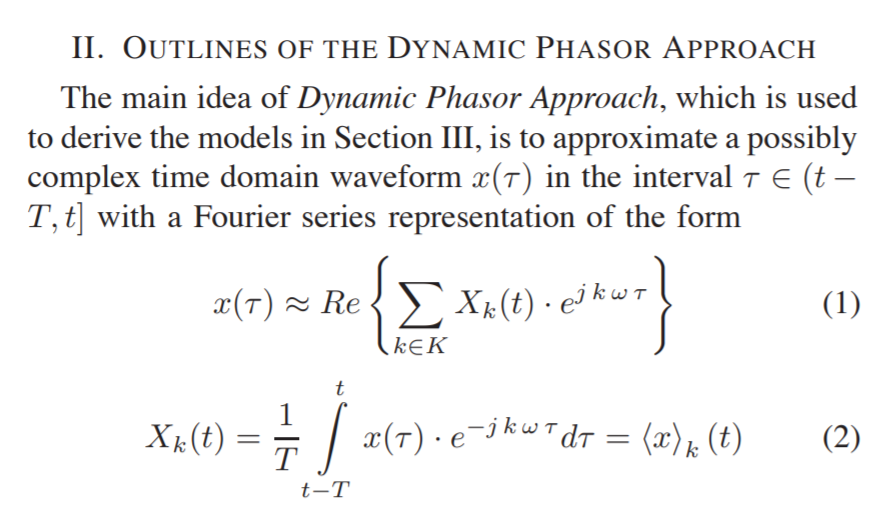
</div>